In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Basic csv manipulation with Pandas dataframe

In [2]:
# dataframe of emails from "sent" directory
df = pd.read_csv("../sent.csv")

In [3]:
df

,idx,from,to,cc,bcc,date,subject,body,x-from,x-to,...,subject_neg,subject_neu,subject_pos,subject_comp,body_neg,body_neu,body_pos,body_comp,forward,reply
0,0,sherri.sera@enron.com,scrapmet@ix.netcom.com,"scippa@petris.com,dsjmorris@e-seis.com,jmgrove...","scippa@petris.com,dsjmorris@e-seis.com,jmgrove...",2000-09-13 04:11:00-07:00,Astros Game,"Ladies and gentlemen of Class #64, Jeff Skilli...",Sherri Sera,Bryan Rosenstrauch <scrapmet@ix.netcom.com>,...,0.000,1.000,0.000,0.0000,0.000000,0.722714,0.277286,0.329000,0.0,0.0
1,1,joannie.williamson@enron.com,gailg@morgangroup.com,NaN,NaN,2001-03-29 08:52:00-08:00,Re: Lunch,April 25 would be the only day that may work f...,Joannie Williamson,"""Gail Glidewell"" <GailG@morgangroup.com>",...,0.000,1.000,0.000,0.0000,0.000000,0.519667,0.480333,0.252867,0.0,1.0
2,2,joannie.williamson@enron.com,amelia.alder@enron.com,NaN,NaN,2001-03-19 01:15:00-08:00,Re: Enron Cycling Club Meeting,"Amelia, Jeff is travelling this week. Thanks, ...",Joannie Williamson,Amelia Alder,...,0.000,1.000,0.000,0.0000,0.000000,0.754000,0.246000,0.220200,0.0,1.0
3,3,joannie.williamson@enron.com,stanmarek@marekbros.com,NaN,NaN,2001-05-04 02:48:00-07:00,Re: Follow-Up - Brent Larsen,Good morning Stan. I am holding 11:00 - Noon ...,Joannie Williamson,stanmarek@marekbros.com,...,0.000,1.000,0.000,0.0000,0.023000,0.677000,0.300000,0.190167,0.0,1.0
4,4,joannie.williamson@enron.com,vanessa.groscrand@enron.com,NaN,NaN,2001-03-21 23:49:00-08:00,Re: Enron Advisory Council,"Vanessa, Jeff is planning to attend. Thanks, J...",Joannie Williamson,Vanessa Groscrand,...,0.000,1.000,0.000,0.0000,0.000000,0.628000,0.372000,0.220200,0.0,1.0
5,5,sherri.sera@enron.com,david.porter@enron.com,NaN,NaN,2000-10-03 05:41:00-07:00,Re: Enron Online Bid/Ask spread question,"Dear David, Jeff will see your e-mail later to...",Sherri Sera,David V. Porter,...,0.000,1.000,0.000,0.0000,0.000000,0.936333,0.063667,0.127267,0.0,1.0
6,6,joannie.williamson@enron.com,ssoles@ziffenergy.com,NaN,NaN,2001-03-20 08:05:00-08:00,Re: Ziff Energy Conference - Calgary November ...,"Shelly, I will discuss with Jeff and get back ...",Joannie Williamson,Shelley Soles <ssoles@ziffenergy.com>,...,0.000,0.811,0.189,0.2732,0.000000,0.704000,0.296000,0.220200,0.0,1.0
7,7,jeff.skilling@enron.com,sherri.sera@enron.com,NaN,NaN,2001-03-06 08:33:00-08:00,Your Voice Mail,NaN,Jeff Skilling,Sherri Sera,...,0.000,1.000,0.000,0.0000,NaN,NaN,NaN,NaN,0.0,0.0
8,8,sherri.sera@enron.com,ranabir.dutt@enron.com,NaN,NaN,2000-12-20 06:42:00-08:00,Re: Elektrobolt FASH changes,"Ranabir, Please be advised that Jeff Skilling ...",Sherri Sera,Ranabir Dutt,...,0.000,1.000,0.000,0.0000,0.000000,0.898000,0.102000,0.159100,0.0,1.0
9,9,sherri.sera@enron.com,"kenneth.lay@enron.com,cliff.baxter@enron.com,r...","rosalee.fleming@enron.com,susan.skarness@enron...","rosalee.fleming@enron.com,susan.skarness@enron...",2001-03-07 01:25:00-08:00,Personal Use of Corporate Aircraft,Please see the attached memo from Jeff and Ken.,Sherri Sera,"Kenneth Lay, Cliff Baxter, Richard Causey, Jam...",...,0.000,1.000,0.000,0.0000,0.000000,0.685000,0.315000,0.318200,0.0,0.0


### Basic filtering and data selection according to strings

In [4]:
# find emails in which a keyword appears
keyword = "legal"
mask_legal_mentioned1 = df["body"].str.match(keyword, case=False, na=False)     #.fillna(False)
mask_legal_mentioned2 = df["body"].str.contains(keyword, case=False, na=False)  # less strict
print("""Number of entries for:
       Stricter keyword matching: {}
       Less strict: {}""".format(mask_legal_mentioned1.sum(), mask_legal_mentioned2.sum()))
df["body"][mask_legal_mentioned2]

Number of entries for:
       Stricter keyword matching: 4
       Less strict: 2450


173      Jim, so long as you and Jim Derrick have appro...
753      I was right on the legal question Jeff asked. ...
963      Mark Can you tell me if this is a legal docume...
1162     Our legal is reviewing right now.  Hopefully, ...
1423     Glad you finally made it!  Good luck on your L...
1829     Please address, and I'll check with Legal as w...
2281     Yes, there is a formalized process.  After Cre...
2731     Please be sure this is in some legal record or...
2995     Please plan to attend a meeting at 5:00 p.m. T...
3045     I think the meeting is on Wednesday, but if yo...
3103     I agree with Rick.  I know Jose is tied up on ...
3389     congratulations! One thing to add to the argum...
3528     Thanks so much for your message.  Your communi...
3727     Tony Pryor (GPG legal) asked if we have any cr...
3915     PLEASE NOTE:  This email includes several item...
4007     I'm ok from a pr and govt affairs standpoint, ...
4029     I do support the change.  Let me know what I c.

In [5]:
# check email
df["body"][55129]

'I anticipate that Enron may have some legal issues in New York similar to the  issues Enron has faced in California.  Can you recommend a top notch trial  lawyer (similar to yourself) at any firms in New York?'

In [6]:
# who sent?
df["from"][55129]

'twanda.sweet@enron.com'

In [7]:
mask_legal_mentioned2.sum()

2450

In [8]:
df["body"][2731]

"Please be sure this is in some legal record or something so I don't have  problems with this in the future. Thanks, Rick"

In [9]:
df["body"][56712]

'I have asked my asst, Twanda Sweet, to set up a meeting on Tues re this  issue. I will include Mike Day. Is there anyone else that should be in this  meeting---EES legal?'

In [10]:
mask_twanda = df["from"].str.contains("twanda", case=False, na=False)
print(mask_twanda.sum())
df["from"][mask_twanda]

158


22284    twanda.sweet@enron.com
22301    twanda.sweet@enron.com
22338    twanda.sweet@enron.com
22349    twanda.sweet@enron.com
22362    twanda.sweet@enron.com
22363    twanda.sweet@enron.com
22373    twanda.sweet@enron.com
22398    twanda.sweet@enron.com
22411    twanda.sweet@enron.com
22435    twanda.sweet@enron.com
22437    twanda.sweet@enron.com
22448    twanda.sweet@enron.com
22485    twanda.sweet@enron.com
22540    twanda.sweet@enron.com
22543    twanda.sweet@enron.com
22547    twanda.sweet@enron.com
22567    twanda.sweet@enron.com
22569    twanda.sweet@enron.com
22574    twanda.sweet@enron.com
22604    twanda.sweet@enron.com
22626    twanda.sweet@enron.com
22631    twanda.sweet@enron.com
22674    twanda.sweet@enron.com
22706    twanda.sweet@enron.com
22751    twanda.sweet@enron.com
22773    twanda.sweet@enron.com
22778    twanda.sweet@enron.com
55129    twanda.sweet@enron.com
55138    twanda.sweet@enron.com
55157    twanda.sweet@enron.com
                  ...          
56354   

In [11]:
np.digitize?

### Preliminary tests for counting emails exchanged between two individuals

In [12]:
df["to"][mask_twanda]

22284                                david.minns@enron.com
22301                                   dick@jeanneret.com
22338                                 drew.lynch@enron.com
22349                                hoyt.thomas@enron.com
22362    andrea.yowman@enron.com,jo.hill@enron.com,davi...
22363                              jeff.skilling@enron.com
22373                             sherry.lessner@enron.com
22398                                      fmackin@aol.com
22411                            emma.caplan@bootsnall.net
22435            jo.hill@enron.com,andrea.yowman@enron.com
22437                              michelle.cash@enron.com
22448                               esholeen@bracepatt.com
22485                                      bogden@ogwb.com
22540                                     steve@ecogas.com
22543                       jcatanzariti@claytonutz.com.au
22547                               john.lambert@enron.com
22567          drew.lynch@enron.com,robert.jones@enron.c

In [13]:
df["to"][mask_twanda].str.contains("david.delainey").sum()

6

In [14]:
for value in df["to"][mask_twanda].fillna('undefined').values:
    try:
        for recipient in value.split(','):
            print(recipient)
    except:
        print(value)

david.minns@enron.com
dick@jeanneret.com
drew.lynch@enron.com
hoyt.thomas@enron.com
andrea.yowman@enron.com
jo.hill@enron.com
david.o'dell@enron.com
lina.jimenez@enron.com
jane.allen@enron.com
michael.baust@enron.com
margaret.daffin@enron.com
elaine.schield@enron.com
jeff.skilling@enron.com
sherry.lessner@enron.com
fmackin@aol.com
emma.caplan@bootsnall.net
jo.hill@enron.com
andrea.yowman@enron.com
michelle.cash@enron.com
esholeen@bracepatt.com
bogden@ogwb.com
steve@ecogas.com
jcatanzariti@claytonutz.com.au
john.lambert@enron.com
drew.lynch@enron.com
robert.jones@enron.com
mark.greenberg@enron.com
debi.vanwey@enron.com
randy.young@enron.com
michelle.hargrave@enron.com
john.schwartzenburg@enron.com
fmackin@aol.com
gary.buck@enron.com
debi.vanwey@enron.com
robert.jones@enron.com
candace.womack@enron.com
tom.moore@enron.com
aallbritton@velaw.com
kim.melodick@enron.com
lclemmons@hotmail.com
cgunter@bracepatt.com
jsariego@mastec.com
mark.haedicke@enron.com
robert.williams@enron.com
brian.vas

steven.kean@enron.com
richard.shapiro@enron.com
james.fallon@enron.com
elizabeth.sager@enron.com
rogers.herndon@enron.com
lloyd.will@enron.com
radack@dca.co.harris.tx.us
edward.sacks@enron.com
rob.milnthorp@enron.com
peter.keohane@enron.com
richard.shapiro@enron.com
jeffrey.hodge@enron.com
dpef@blakes.com
awm@blakes.com
dwm@blakes.com
mmo@blakes.com
gfl@blakes.com
rek@blakes.com
mtuohey@velaw.com
steven.kean@enron.com
john.nowlan@enron.com
alan.aronowitz@enron.com
vicki.sharp@enron.com
patrick.danaher@enron.com
eric.thode@enron.com
david.rawlings@enron.com
brad.cheney@enron.com
kevin.presto@enron.com
joe.hartsoe@enron.com
steven.kean@enron.com
richard.shapiro@enron.com
james.fallon@enron.com
elizabeth.sager@enron.com
richard.ingersoll@enron.com
rogers.herndon@enron.com
lloyd.will@enron.com
greg.whalley@enron.com
jeffrey.hodge@enron.com
rob.milnthorp@enron.com
peter.keohane@enron.com
richard.shapiro@enron.com
jeffrey.hodge@enron.com
dpef@blakes.com
awm@blakes.com
dwm@blakes.com
mmo@blak

In [15]:
def extract_emails_recipients(sender, df=df):
    """Lists contacts from sender according to entries in the 'to' field.
    It does perform a non-strict check for sender, so please do provide a fairly constraining string
    or data series df."""
    
    assert type(sender) is str, "sender field must be a string"
    
    # data series selection (mask)
    from_sender = df["from"].str.contains(sender, case=False, na=False)
    
    # extract unique entries from the 'to' field
    recipients_set = set()
    for value in df['to'][from_sender].fillna('undefined').values:
        for recipient in value.split(','):
            recipients_set.add(recipient)
    
    return recipients_set

extract_emails_recipients("twanda")

{'aallbritton@velaw.com',
 'al_alexanderson@pgn.com',
 'alan.aronowitz@enron.com',
 'aleck.dadson@enron.com',
 'allen.wilhite@enron.com',
 'andrea.yowman@enron.com',
 'andrew.kelemen@enron.com',
 'ann.white@enron.com',
 'awm@blakes.com',
 'bhansen@lhom.com',
 'bogden@ogwb.com',
 'bonnie.white@enron.com',
 'brad.cheney@enron.com',
 'brian.bierbach@enron.com',
 'brian.redmond@enron.com',
 'brian.vass@enron.com',
 'britt.davis@enron.com',
 'candace.bywaters@enron.com',
 'candace.womack@enron.com',
 'carey.metz@enron.com',
 'cecklund@llgm.com',
 'ceklund@llgm.com',
 'cgunter@bracepatt.com',
 'charles.cheek@enron.com',
 'charlie.hoang@enron.com',
 'christian.yoder@enron.com',
 'cliff.baxter@enron.com',
 'dale.rasmussen@enron.com',
 'dan.hyvl@enron.com',
 'dan.leff@enron.com',
 'dan.lyons@enron.com',
 'daniel.lyons@enron.com',
 'daniel.reck@enron.com',
 'david.delainey@enron.com',
 'david.fairley@enron.com',
 'david.minns@enron.com',
 "david.o'dell@enron.com",
 'david.rawlings@enron.com',
 '

### Main routine for quantifying connections and simple visualization example

In [16]:
def count_sent_to(sender, df=df, **kw):
    """Finds the contact list and contact frequency of a person.
            
    Arguments:
    ---
    * sender -- string identifying the sender according to the 'from' column
    * df -- pandas dataframe or series; defaults to pd.read_csv("../sent.csv")
    * kw -- extra optional arguments for numpy.unique
    
    Returns:
    ---
    * array of unique contacts from sender according to entries in the 'to' field
    * frequency in which those contacts show up in the 'to' field of dataframe for this sender
    
    Notes:
    ---
    Helper function for communication frequency histogram / network quantification.
    It performs a non-strict 'contains' check for sender. Providing a fairly constraining sender string 
    (or data series df) is advised.
    
    See also:
    ---
    numpy.unique
    """
    
    assert type(sender) is str, "sender field must be a string"
    
    # data series selection (mask)
    from_sender = df["from"].str.contains(sender, case=False, na=False)

    flatten = [entry for value in df['to'][from_sender].fillna('undefined').values for entry in value.split(',')]
    # TODO: implement cc and bcc
    
    return np.unique(flatten, return_counts=True, **kw)
    
to_whom, counts = count_sent_to("twanda")

In [17]:
def make_room_for_xlabels(fig, ax, N):
    # ref: https://stackoverflow.com/a/44864135

    tl = ax.get_xticklabels()
    maxsize = max([t.get_window_extent().width for t in tl])
    m = 0.2 # inch margin
    s = maxsize/fig.dpi * N + 2 * m
    margin = m/fig.get_size_inches()[0]

    fig.subplots_adjust(left=margin, right=1.-margin)
    fig.set_size_inches(s, plt.gcf().get_size_inches()[1])
    return

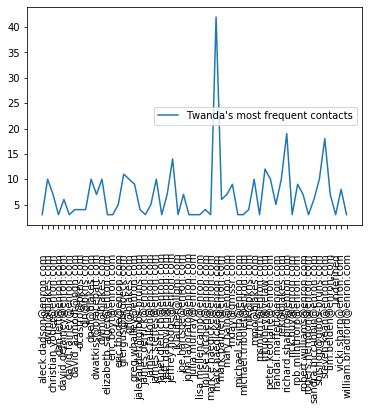

In [18]:
threshold = .7
most_frequent = counts >= np.quantile(counts, threshold)  # mask

fig, ax = plt.subplots()
ax.plot(to_whom[most_frequent], counts[most_frequent], label='Twanda\'s most frequent contacts')
ax.xaxis.set_tick_params(rotation=90)
ax.legend()
# fig.set_size_inches()
# make_room_for_xlabels(fig, ax, most_frequent.sum())
# fig.tight_layout()
ax.tick_params(axis='x', which='major', pad=25)